<a href="https://www.kaggle.com/code/javierpachas/nlp-pytorch-03-nn?scriptVersionId=145752595" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# The Perceptron: The Simplest Neural Network

Implementing a perceptron using PyTorch

In [12]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim

class Perceptron(nn.Module):
    """ A perceptron is one linear layer"""
    def __init__(self, input_dim):
        """
        Args:
            input_dim (int): size of the input features
        """
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1)
    
    def forward(self, x_in):
        """ The forward pass of the perceptron
        Args:
            x_in (torch.Tensor): an input data tensor
                x_in.shape should be (batch, num_features)
        Returns:
            the resulting tensor tensor.shape should be (batch,)
        """
        return torch.sigmoid(self.fc1(x_in)).squeeze()

## Activation Functions

### Sigmoid
$f(x) = 1/(1+exp(-x))$

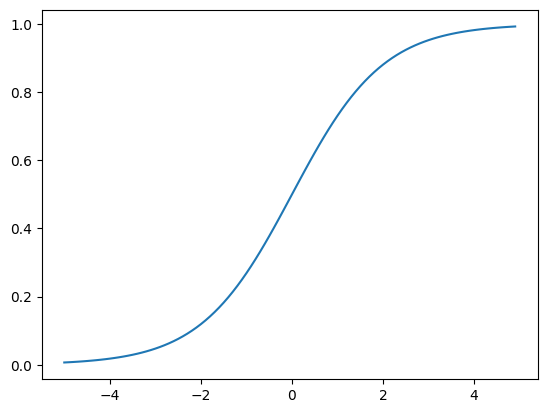

In [3]:
import torch
import matplotlib.pyplot as plt

x = torch.arange(-5, 5, 0.1)
y = torch.sigmoid(x)

plt.plot(x.numpy(), y.numpy())
plt.show()

### Tanh
$f(x)=tanh(x)=(e^x -e^{-x})/(e^{x}+e^{-x})$

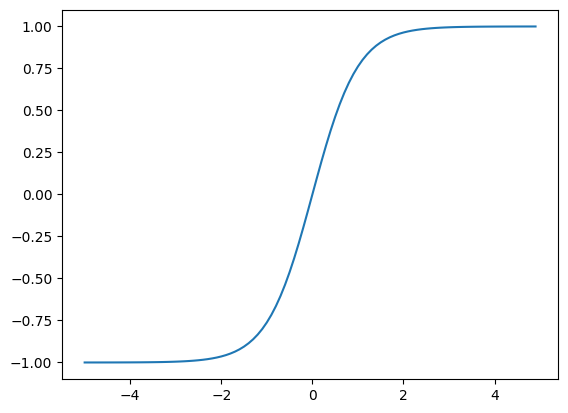

In [4]:
import torch
import matplotlib.pyplot as plt

x = torch.arange(-5,5,0.1)
y = torch.tanh(x)

plt.plot(x.numpy(), y.numpy())
plt.show()

### ReLU: Rectified Linear Unit
$f(x)= max(0,x)$

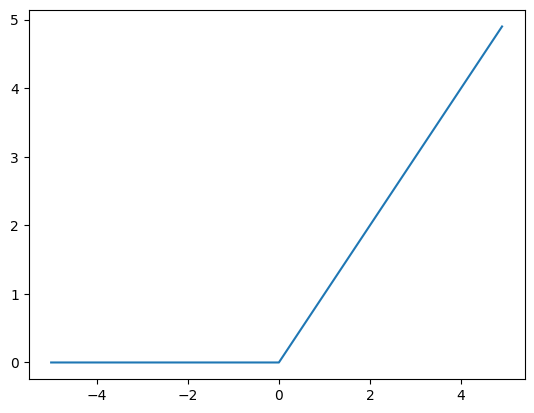

In [5]:
import torch
import matplotlib.pyplot

relu = torch.nn.ReLU()
x = torch.arange(-5,5,0.1)
y = relu(x)

plt.plot(x.numpy(), y.numpy())
plt.show()

**PReLU Activation:** A leak coefficient $a$ is a learned parameter
$$f(x)=max(0,ax)$$

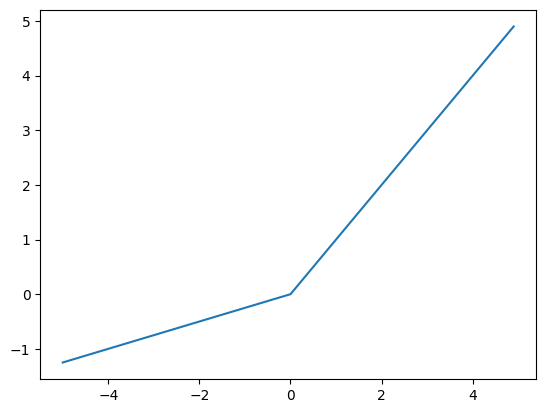

In [7]:
import torch
import matplotlib.pyplot as plt

prelu = torch.nn.PReLU(num_parameters = 1)
x = torch.arange(-5., 5.,0.1)
y = prelu(torch.Tensor(x))

plt.plot(x, y.detach().numpy())
plt.show()

### Softmax
$$softmax(x_i)= \frac{e^{x_i}}{\sum_{j=1}^{k}e^{x_j}}$$

In [20]:
import torch
import torch.nn as nn

softmax = nn.Softmax(dim= 1)
x_input = torch.randn(1,3)
y_output = softmax(x_input)

print("x_input: {}".format(x_input))
print("y_output: {}".format(y_output))

print(torch.sum(y_output, dim = 1))

x_input: tensor([[-1.5079,  0.2513, -0.2483]])
y_output: tensor([[0.0968, 0.5621, 0.3411]])
tensor([1.])


## Loss Functions

### Mean Squared Error Loss

$$L_{MLE}=\frac{1}{n}\sum_{i=1}^{n}(y-\hat{y})^2$$

In [1]:
import torch
import torch.nn as nn

mse_loss = nn.MSELoss()
outputs = torch.randn(3,5, requires_grad = True)
targets = torch.randn(3,5)

loss = mse_loss(outputs, targets)
print(loss)

tensor(2.2329, grad_fn=<MseLossBackward0>)


### Categorical Cross-Entropy Loss

$$L_{cross entropy} (y,\hat{y})=-\sum_{i} y_i log(\hat{y}_i)$$

In [1]:
import torch
import torch.nn as nn

ce_loss = nn.CrossEntropyLoss()
outputs = torch.randn(3,5, requires_grad = True)
targets = torch.tensor([1,0,3], dtype = torch.int64)
loss = ce_loss(outputs, targets)

print(loss)

tensor(2.4207, grad_fn=<NllLossBackward0>)


### Binary Cross-Entropy Loss

In [4]:
bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid()
probabilities = sigmoid(torch.randn(4,1, requires_grad = True))
targets = torch.tensor([1,0,1,0], dtype = torch.float32).view(4,1)
loss = bce_loss(probabilities, targets)
print(probabilities)
print(loss)

tensor([[0.4247],
        [0.5533],
        [0.4523],
        [0.4605]], grad_fn=<SigmoidBackward0>)
tensor(0.7682, grad_fn=<BinaryCrossEntropyBackward0>)


In [1]:
LEFT_CENTER = (3, 3)
RIGHT_CENTER = (3, -2)

In [2]:
def get_toy_data(batch_size, left_center=LEFT_CENTER, right_center=RIGHT_CENTER):
    x_data = []
    y_targets = np.zeros(batch_size)
    for batch_i in range(batch_size):
        if np.random.random() > 0.5:
            x_data.append(np.random.normal(loc=left_center))
        else:
            x_data.append(np.random.normal(loc=right_center))
            y_targets[batch_i] = 1
    return torch.tensor(x_data, dtype=torch.float32), torch.tensor(y_targets, dtype=torch.float32)

**Visualizing results function**

In [3]:
def visualize_results(perceptron, x_data, y_truth, n_samples=1000, ax=None, epoch=None, 
                      title='', levels=[0.3, 0.4, 0.5], linestyles=['--', '-', '--']):
    y_pred = perceptron(x_data)
    y_pred = (y_pred > 0.5).long().data.numpy().astype(np.int32)

    x_data = x_data.data.numpy()
    y_truth = y_truth.data.numpy().astype(np.int32)

    n_classes = 2

    all_x = [[] for _ in range(n_classes)]
    all_colors = [[] for _ in range(n_classes)]
    
    colors = ['black', 'white']
    markers = ['o', '*']
    
    for x_i, y_pred_i, y_true_i in zip(x_data, y_pred, y_truth):
        all_x[y_true_i].append(x_i)
        if y_pred_i == y_true_i:
            all_colors[y_true_i].append("white")
        else:
            all_colors[y_true_i].append("black")
        #all_colors[y_true_i].append(colors[y_pred_i])

    all_x = [np.stack(x_list) for x_list in all_x]

    if ax is None:
        _, ax = plt.subplots(1, 1, figsize=(10,10))
        
    for x_list, color_list, marker in zip(all_x, all_colors, markers):
        ax.scatter(x_list[:, 0], x_list[:, 1], edgecolor="black", marker=marker, facecolor=color_list, s=300)
    
        
    xlim = (min([x_list[:,0].min() for x_list in all_x]), 
            max([x_list[:,0].max() for x_list in all_x]))
            
    ylim = (min([x_list[:,1].min() for x_list in all_x]), 
            max([x_list[:,1].max() for x_list in all_x]))
            
    # hyperplane
    
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    
    Z = perceptron(torch.tensor(xy, dtype=torch.float32)).detach().numpy().reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=levels, linestyles=linestyles)    
    
    plt.suptitle(title)
    
    if epoch is not None:
        plt.text(xlim[0], ylim[1], "Epoch = {}".format(str(epoch)))

**Initial Data Plot**

/tmp/ipykernel_32/1304533793.py:10: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  return torch.tensor(x_data, dtype=torch.float32), torch.tensor(y_targets, dtype=torch.float32)


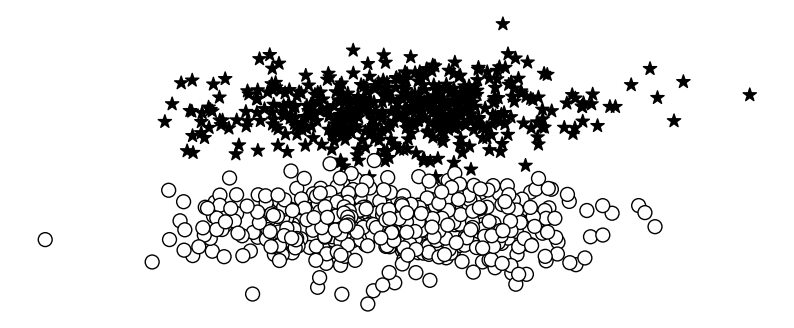

In [11]:
seed = 142

torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)

x_data, y_truth = get_toy_data(batch_size=1000)

x_data = x_data.data.numpy()
y_truth = y_truth.data.numpy()

left_x = []
right_x = []
left_colors = []
right_colors =  []

for x_i, y_true_i in zip(x_data, y_truth):
    color = 'black'

    if y_true_i == 0:
        left_x.append(x_i)
        left_colors.append(color)

    else:
        right_x.append(x_i)
        right_colors.append(color)

left_x = np.stack(left_x)
right_x = np.stack(right_x)

_, ax = plt.subplots(1, 1, figsize=(10,4))

ax.scatter(left_x[:, 0], left_x[:, 1], color=left_colors, marker='*', s=100)
ax.scatter(right_x[:, 0], right_x[:, 1], facecolor='white', edgecolor=right_colors, marker='o', s=100)

plt.axis('off');


Instantiating the Adam optimizer

In [13]:
import torch.nn as nn
import torch.optim as optim

input_dim = 2
lr = 0.001 #default value in Adam (adaptive optimizer)

perceptron = Perceptron(input_dim = input_dim)
bce_loss = nn.BCELoss()
optimizer = optim.Adam(params = perceptron.parameters(), lr = lr)

The entire training dataset is partitioned into batches. Each iteration of the gradient step is performed on a batch of data. A hyperparameter named batch_size specifies the size of the batches. Because the training dataset is fixed, increasing the batch size decreases the number of batches.

**A supervised training loop for a perceptron and binary classification**

In [14]:
#each epoch is a complete pass over the training data

for epoch_i in range(n_epochs):
    #the inner loop is over the batches in the dataset
    for batch_i in range(n_batches):
        #step 0: get the data
        x_data, y_target = get_toy_data(batch_size)
        
        #step 1: clear the gradients
        perceptron.zero_grad()
        
        #step 2: compute the forward pass of the model
        y_pred = perceptron(x_data, apply_sigmoid = True)
        
        #step 3: compute the loss value that we wish to optimize
        loss = bce_loss(y_pred, y_target)
        
        #step 4: propagate the loss signal backward
        loss.backward()
        
        #step 5: trigger the optimizer to perform one update
        optimizer.step()
        

NameError: name 'n_epochs' is not defined